In [10]:
import numpy as np

In [63]:
import matplotlib.pyplot as plt

In [1]:
from google.cloud import bigquery

client = bigquery.Client()

In [5]:
sql = """
SELECT * FROM `helical-rock-397301.datasec.security`
"""
df = client.query(sql).to_dataframe()

df.head()

,cd_month_start,tool,ds_url_issue,in_criticity,in_deadline,cd_month_end,dt_created,nm_source_data,dt_closed,id_vulnerability,ds_title,st_vulnerability,nm_repository,nm_squad
0,2023-08,White Source,https://github.com/michelleamesquita/vuln-web-...,Low,good :),2024-02,2023-08-09,SCA,2024-02-05,0,[Snyk] Security upgrade python from 3.6 to 3.1...,open,https://github.com/michelleamesquita/vuln-web-app,michelleamesquita
1,2023-07,White Source,https://github.com/michelleamesquita/vuln-web-...,Low,good :),2024-01,2023-07-28,SCA,2024-01-24,1,[Snyk] Security upgrade python from 3.6 to 3.8,open,https://github.com/michelleamesquita/vuln-web-app,michelleamesquita
2,2023-07,White Source,https://github.com/michelleamesquita/vuln-web-...,Low,good :),2024-01,2023-07-06,SCA,2024-01-02,2,[Snyk] Security upgrade python from 3.6 to 3.8,open,https://github.com/michelleamesquita/vuln-web-app,michelleamesquita
3,2023-06,White Source,https://github.com/michelleamesquita/vuln-web-...,Low,good :),2023-12,2023-06-22,SCA,2023-12-19,3,[Snyk] Security upgrade python from 3.6 to 3.1...,open,https://github.com/michelleamesquita/vuln-web-app,michelleamesquita
4,2023-06,White Source,https://github.com/michelleamesquita/vuln-web-...,Low,good :),2023-12,2023-06-14,SCA,2023-12-11,4,[Snyk] Security upgrade python from 3.6 to 3.1...,open,https://github.com/michelleamesquita/vuln-web-app,michelleamesquita


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cd_month_start    32 non-null     object
 1   tool              32 non-null     object
 2   ds_url_issue      32 non-null     object
 3   in_criticity      32 non-null     object
 4   in_deadline       32 non-null     object
 5   cd_month_end      32 non-null     object
 6   dt_created        32 non-null     dbdate
 7   nm_source_data    32 non-null     object
 8   dt_closed         32 non-null     dbdate
 9   id_vulnerability  32 non-null     Int64 
 10  ds_title          32 non-null     object
 11  st_vulnerability  32 non-null     object
 12  nm_repository     32 non-null     object
 13  nm_squad          32 non-null     object
dtypes: Int64(1), dbdate(2), object(11)
memory usage: 3.7+ KB


## Quantidade de vulnerabilidade por ferramenta de segurança

In [94]:
df.groupby('nm_source_data').sum().apply(lambda x: x.sort_values(ascending=False))

,id_vulnerability
nm_source_data,
SAST,231
DAST,145
SCA,120


In [ ]:
## Quantidade de vulnerabilidade por projeto e ferramenta
### Assim, é possível ver que o SAST, tendo um projeto, vemos mais vulnerabilidades por estar no início da p

In [59]:
df.groupby(['nm_repository','nm_source_data']).aggregate(np.sum).apply(lambda x: x.sort_values(ascending=False))

,,id_vulnerability
nm_repository,nm_source_data,
https://github.com/michelleamesquita/vuln-web-app/tree/bb37b6fa7c747f0c615440de9df846cad91ebe6e,SAST,161
https://gitlab.com/api/v4/projects/28815326/jobs/artifacts/main/raw/report_json.json?job=owasp,DAST,145
https://github.com/michelleamesquita/vuln-web-app,SCA,78
https://github.com/michelleamesquita/cypress-ci-report,SCA,42
https://gitlab.com/michelleamesquita/devsecops2/tree/736d8bf5654f634f0cd932be4604c467ddb7ed05,SAST,37
https://github.com/michelleamesquita/python-simple-web-app/tree/87d085ab2b7c624d13d16616cecd9a5207bcec73,SAST,33


## Maiores vulnerabilidades

In [48]:
df.groupby('ds_title').aggregate(np.sum).apply(lambda x: x.sort_values(ascending=False)).head(5)

,id_vulnerability
ds_title,
Cross-site Scripting (XSS),85
Debug Mode Enabled,56
Permissions Policy Header Not Set,31
Application Error Disclosure,30
Missing Anti-clickjacking Header,29


In [128]:
top_vulns=df.groupby(['ds_title','nm_source_data']).aggregate(np.sum).apply(lambda x: x.sort_values(ascending=False)).head()['id_vulnerability']

## Top Vulnerabilidades

([<matplotlib.patches.Wedge at 0x7f21b58d9190>,
 [Text(0.443306604716433, 1.0067170676087638, 'Cross-site Scripting (XSS)'),
  Text(-1.097457794561325, 0.07474215113704387, 'Debug Mode Enabled'),
  Text(-0.4840002185922622, -0.987797443002685, 'Permissions Policy Header Not Set'),
  Text(0.4018751519118851, -1.023961113654127, 'Application Error Disclosure'),
  Text(1.0155504076014068, -0.4226788019532287, 'Missing Anti-clickjacking Header\t')])

/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


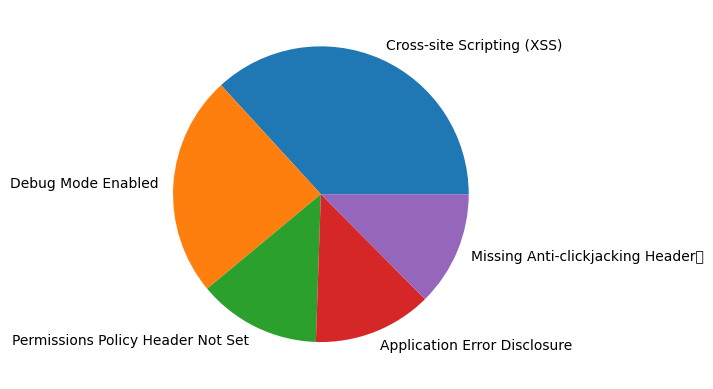

In [134]:
labels = 'Cross-site Scripting (XSS)', 'Debug Mode Enabled', 'Permissions Policy Header Not Set', 'Application Error Disclosure','Missing Anti-clickjacking Header	'
sizes = top_vulns

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [58]:
df.groupby(['ds_title','nm_source_data']).aggregate(np.sum).apply(lambda x: x.sort_values(ascending=False))

,,id_vulnerability
ds_title,nm_source_data,
Cross-site Scripting (XSS),SAST,85
Debug Mode Enabled,SAST,56
Permissions Policy Header Not Set,DAST,31
Application Error Disclosure,DAST,30
Missing Anti-clickjacking Header,DAST,29
Content Security Policy (CSP) Header Not Set,DAST,28
Absence of Anti-CSRF Tokens,DAST,27
Path Traversal,SAST,26
Command Injection,SAST,23


## Maiores vulnerabilidades SCA

In [60]:
df[df['nm_source_data']=='SCA'].groupby('ds_title').sum().head()

,id_vulnerability
ds_title,
Configure Mend Bolt for GitHub,12
[Snyk] Security upgrade python from 3.6 to 3.10.10,7
[Snyk] Security upgrade python from 3.6 to 3.10.11,6
[Snyk] Security upgrade python from 3.6 to 3.10.12,4
[Snyk] Security upgrade python from 3.6 to 3.10.9,11


## Maiores vulnerabilidades SAST

In [61]:
df[df['nm_source_data']=='SAST'].groupby('ds_title').sum().head()

,id_vulnerability
ds_title,
Command Injection,23
Cross-site Scripting (XSS),85
Debug Mode Enabled,56
Hardcoded Secret,20
Path Traversal,26


## Maiores vulnerabilidades DAST

In [93]:
df[df['nm_source_data']=='DAST'].groupby('ds_title').sum().head()

,id_vulnerability
ds_title,
Absence of Anti-CSRF Tokens,27
Application Error Disclosure,30
Content Security Policy (CSP) Header Not Set,28
Missing Anti-clickjacking Header,29
Permissions Policy Header Not Set,31


## Vulnerabilidades pelo tempo

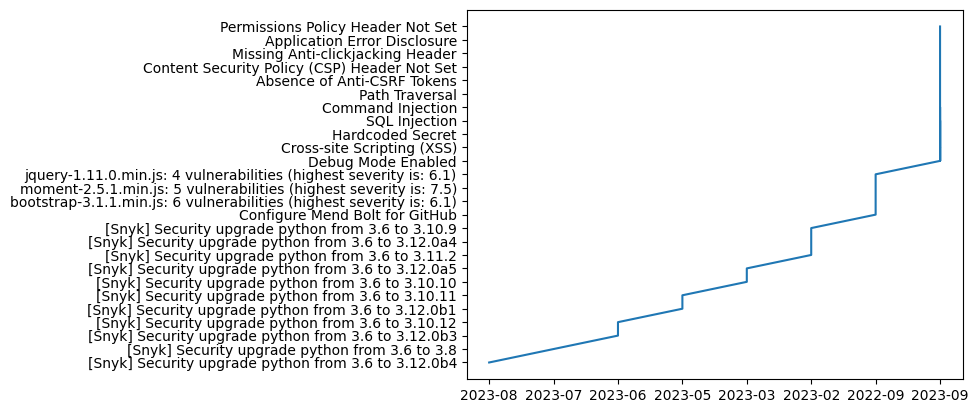

In [140]:
plt.plot(df.cd_month_start, df.ds_title)
plt.show()